In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## OMP Particles

In [11]:
omp_particles = pd.read_csv('Results2.0/omp_particles.txt')

In [12]:
omp_particles.tail()

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
24,2,2000,8,36678.501357,301,6.295,0.020915
25,1,2000,64,305190.566085,700,787.176,1.124538
26,1,2000,32,142348.253095,517,150.993,0.292056
27,1,2000,16,69214.420779,207,14.731,0.071166
28,1,2000,8,40710.391489,167,2.961,0.017729


In [18]:
cores = omp_particles[omp_particles[' num_particles']==64]['cores'].unique()

In [19]:
x = omp_particles[(omp_particles[' num_particles']==16)][' elapsed/gen_count'].to_list()[-1]*1000

In [20]:
omp_particles[(omp_particles[' num_particles']==16)][' elapsed/gen_count']

3     0.095126
8     0.055906
13    0.036613
18    0.039341
23    0.049016
27    0.071166
Name:  elapsed/gen_count, dtype: float64

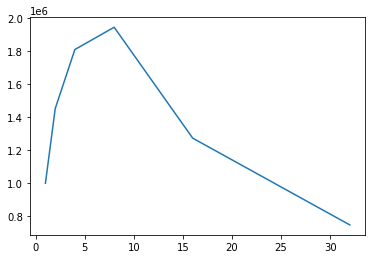

In [21]:
plt.plot(cores,x/omp_particles[omp_particles[' num_particles']==16][' elapsed/gen_count']*1000)

In [22]:
omp_particles[omp_particles[' num_particles']==128]

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
0,32,2000,128,582259.067316,1000,305.425,0.305425
5,16,2000,128,643567.354327,1000,400.819,0.400819
10,8,2000,128,663788.111403,1000,627.419,0.627419
15,4,2000,128,627058.197193,1000,1216.542,1.216542
20,2,2000,128,589997.516342,1000,2518.594,2.518594


### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


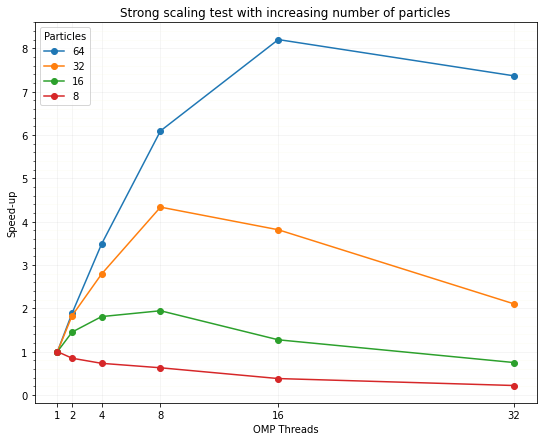

In [24]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
for num_particles in omp_particles[' num_particles'].unique()[1:]:
    seq_time = omp_particles[(omp_particles[' num_particles']==num_particles)][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores,seq_time/omp_particles[omp_particles[' num_particles']==num_particles][' elapsed/gen_count'], 
             marker='o')
plt.xticks(ticks = cores)
plt.legend([128,64,32,16,8][1:],title="Particles")
plt.title('Strong scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

### Weak Scaling test

KeyError: 5

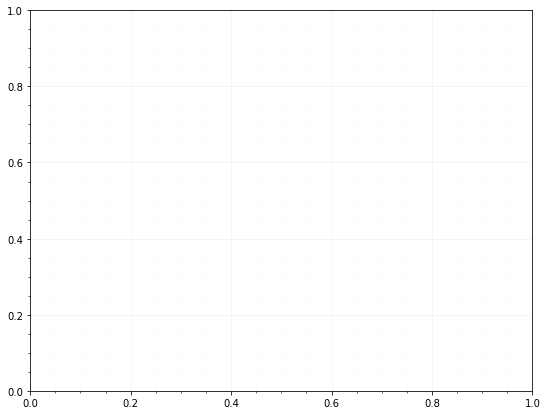

In [26]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
particles = omp_particles[' num_particles'].unique()[::-1]
for i in range(len(cores)):
    x = omp_particles[omp_particles[' num_particles']==particles[i]][' elapsed/gen_count'][(len(cores)-1)-i]
    seq_time = omp_particles[omp_particles[' num_particles']==particles[i]][' elapsed/gen_count'].to_list()[-1]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores[::-1],np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores)
plt.title('Weak scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

## OMP population

In [27]:
omp_pop = pd.read_csv('Results2.0/omp_population.txt')

In [28]:
omp_pop.head(6)

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
0,32,64000,20,97660.766334,138,462.833,3.353862
1,32,32000,20,97660.782973,156,350.173,2.244697
2,32,16000,20,97660.782970,238,206.821,0.868994
3,32,8000,20,85399.000567,241,87.630,0.363610
4,32,4000,20,97660.502924,258,50.118,0.194257
5,32,2000,20,97660.055528,473,44.343,0.093748


In [29]:
cores = omp_pop[omp_pop[' pop_size']==64000]['cores'].to_list()

In [34]:
omp_pop[omp_pop[' pop_size']==64000][' elapsed/gen_count'].to_list()[-1]/omp_pop[omp_pop[' pop_size']==64000][' elapsed/gen_count']

0     0.873494
6     1.480109
12    1.872655
18    1.796519
29    1.191888
35    1.000000
Name:  elapsed/gen_count, dtype: float64

### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


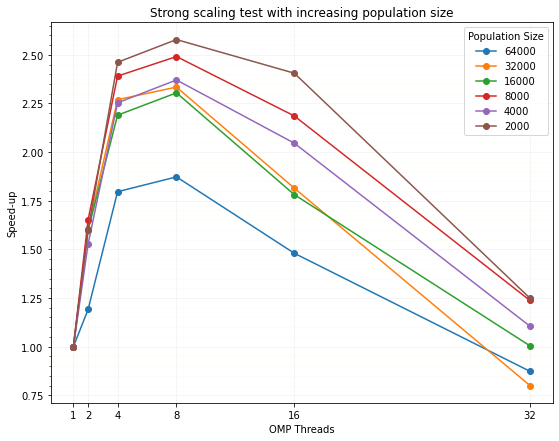

In [32]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
for pop in omp_pop[' pop_size'].unique():
    seq_time = omp_pop[omp_pop[' pop_size']==pop][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores, seq_time/omp_pop[omp_pop[' pop_size']==pop][' elapsed/gen_count'], marker='o')
plt.xticks(ticks = cores)
plt.legend([64000,32000,16000,8000,4000,2000],title="Population Size")
plt.title('Strong scaling test with increasing population size')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

### Weak scaling test

Text(0, 0.5, 'Speed-up')

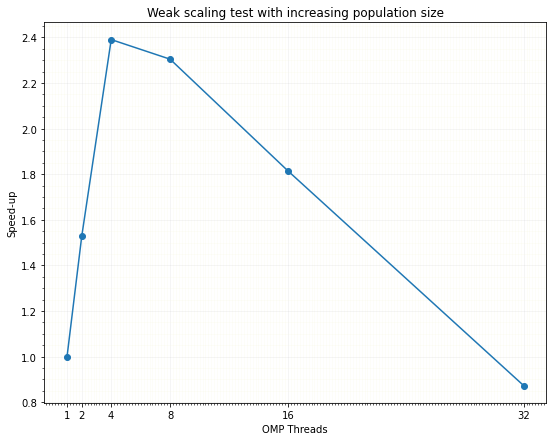

In [255]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
pops = omp_pop[' pop_size'].unique()[::-1]
cores = omp_pop['cores'].unique()
cores = cores[::-1]
for i in range(len(cores)):
    x = omp_pop[omp_pop[' pop_size']==pops[i]].loc[omp_pop['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = omp_pop[omp_pop[' pop_size']==pops[i]].loc[omp_pop['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores,np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores)
plt.title('Weak scaling test with increasing population size')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

In [250]:
cores = omp_pop['cores'].unique()

In [251]:
cores

array([32, 16,  8,  4,  2,  1])

In [232]:
seq_times

[30    0.117119
 Name:  elapsed/gen_count, dtype: float64,
 31    0.21469
 Name:  elapsed/gen_count, dtype: float64,
 32    0.449926
 Name:  elapsed/gen_count, dtype: float64,
 33    0.872855
 Name:  elapsed/gen_count, dtype: float64,
 34    1.796816
 Name:  elapsed/gen_count, dtype: float64,
 35    2.929577
 Name:  elapsed/gen_count, dtype: float64]

In [231]:
np.array(seq_times)/np.array(times)

KeyError: 0

In [181]:
omp_pop.tail(6)

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
30,1,2000,20,97605.392062,291,34.082,0.117119
31,1,4000,20,101914.248234,305,65.480,0.214690
32,1,8000,20,93684.752361,243,109.332,0.449926
33,1,16000,20,89485.641905,150,130.928,0.872855
34,1,32000,20,101691.528078,185,332.411,1.796816
35,1,64000,20,97660.782950,203,594.704,2.929577


## MPI particles

In [ ]:
mpi_particles = pd.read_csv('R')

## MPI population

In [191]:
cores

0     32
6     16
12     8
18     4
29     2
35     1
Name: cores, dtype: int64